In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [[0,0,0],
    [0,1,0],
    [1,0,0],
    [1,1,0],
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]]
X = np.array(X).T
Y = np.array([[1, 0, 0, 1, 0, 1, 1, 0]])
print(X,Y)

[[0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]
 [0 0 0 0 1 1 1 1]] [[1 0 0 1 0 1 1 0]]


In [3]:
#model : (input) 3 neurons -> 5 neurons -> 1 neuron (output)

layer_dims = [3,5,1]
np.random.seed(0)
W1 = np.random.randn(layer_dims[1],layer_dims[0])
b1 = np.zeros((layer_dims[1],1))
W2 = np.random.randn(layer_dims[2],layer_dims[1])
b2 = np.zeros((layer_dims[2],1))

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def forward_propagation(X):
    #forward Propagation
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    return A2,A1

In [6]:
#Training
epoch = 5000
m = 8
lr = 0.1
costs = []
for i in range(epoch):
    
    A2,A1 = forward_propagation(X)
    
    #compute cost
    cost = (np.dot(Y,np.log(A2.T))+np.dot(1-Y,np.log(1-A2.T))) * (-1)/m
    cost = cost.squeeze()
    costs.append(cost)
    #backward propagation
    dZ2 = A2 - Y                                 #because sigmoid
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T,dZ2)*(1-np.square(A1))     #because tanh
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    #update parameters
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    
    if i%100==0:
        correct=0
        total = m
        preds = np.floor(A2+0.5)
        correct = (preds==Y).sum()
        accuracy = correct/m
        print("Cost : {} \t accuracy :{}".format(cost,accuracy))

        

Cost : 0.8152690993227492 	 accuracy :0.625
Cost : 0.6284291439051125 	 accuracy :0.625
Cost : 0.6052190164559162 	 accuracy :0.625
Cost : 0.5807876644916267 	 accuracy :0.75
Cost : 0.5508797119320984 	 accuracy :0.75
Cost : 0.5091729237820262 	 accuracy :0.75
Cost : 0.4502147657601738 	 accuracy :0.75
Cost : 0.3837840344312594 	 accuracy :0.75
Cost : 0.32830974019814096 	 accuracy :0.75
Cost : 0.28950735326548804 	 accuracy :0.75
Cost : 0.263520255851838 	 accuracy :0.75
Cost : 0.24579014045322234 	 accuracy :0.75
Cost : 0.23325579830512183 	 accuracy :0.75
Cost : 0.22406792259258068 	 accuracy :0.75
Cost : 0.21711190808685193 	 accuracy :0.75
Cost : 0.2116976209931093 	 accuracy :0.75
Cost : 0.2073829973936112 	 accuracy :0.75
Cost : 0.20387518133847682 	 accuracy :0.75
Cost : 0.2009740423070695 	 accuracy :0.75
Cost : 0.19853894374601716 	 accuracy :0.75
Cost : 0.1964685684455043 	 accuracy :0.75
Cost : 0.19468829277415275 	 accuracy :0.75
Cost : 0.19314205779074353 	 accuracy :0.75

Predictions:  [[0.99680172 0.01472932 0.01707495 0.92158035 0.00419436 0.99861588
  0.98307716 0.06708247]]
labels:  [[1 0 0 1 0 1 1 0]]


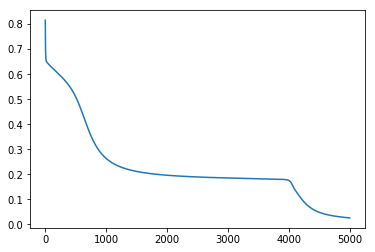

In [7]:
preds, _ = forward_propagation(X)
print("Predictions: ", preds)
print("labels: ", Y)
plt.plot(costs)